In [1]:
# Importing Pandas and reading the dataset
import pandas as pd

# Reading the dataset's CSV file
df = pd.read_csv('C:/Users/Dell/University/NLP/cleaned_reviews.csv', engine='python', index_col=False)

# Printing the dataset
df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [2]:
df.columns

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [3]:
# Dropping the Index colums as it is not relevant
df = df.drop(['cleaned_review_length'], axis=1, inplace = False)
df = df.drop(['review_score'], axis=1, inplace = False)
df = df.reset_index(drop=True)
df

,sentiments,cleaned_review
0,positive,i wish would have gotten one earlier love it a...
1,neutral,i ve learned this lesson again open the packag...
2,neutral,it is so slow and lags find better option
3,neutral,roller ball stopped working within months of m...
4,neutral,i like the color and size but it few days out ...
...,...,...
17335,positive,i love this speaker and love can take it anywh...
17336,positive,i use it in my house easy to connect and loud ...
17337,positive,the bass is good and the battery is amazing mu...
17338,positive,love it


In [4]:
# Text manipulation libraries
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """Function that cleans the input text by going to:
    - remove links
    - remove special characters
    - remove numbers
    - remove stopwords
    - convert to lowercase
    - remove excessive white spaces
    Arguments:
        text (str): text to clean
        remove_stopwords (bool): whether to remove stopwords
    Returns:
        str: cleaned text
    """
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove numbers and special characters
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. create tokens
        tokens = nltk.word_tokenize(text)
        # 2. check if it's a stopword
        tokens = [w.lower().strip() for w in tokens if not w.lower() in stopwords.words("english")]
        # return a list of cleaned tokens
        return tokens

In [6]:
df['cleaned'] = df['cleaned_review'].apply(
    lambda myx: preprocess_text(str(myx), remove_stopwords=True)
  )

In [7]:
print(df)

      sentiments                                     cleaned_review  \
0       positive  i wish would have gotten one earlier love it a...   
1        neutral  i ve learned this lesson again open the packag...   
2        neutral          it is so slow and lags find better option   
3        neutral  roller ball stopped working within months of m...   
4        neutral  i like the color and size but it few days out ...   
...          ...                                                ...   
17335   positive  i love this speaker and love can take it anywh...   
17336   positive  i use it in my house easy to connect and loud ...   
17337   positive  the bass is good and the battery is amazing mu...   
17338   positive                                            love it   
17339    neutral                                       mono speaker   

                                                 cleaned  
0      [wish, would, gotten, one, earlier, love, make...  
1      [learned, lesson, open

In [8]:
# Splitting the data into Training and Testing sets
from sklearn.model_selection import train_test_split

# The X represents the Features; what we will use to predict the Target
X = df['cleaned']

# The y represents the Target; in our case, the target is whether the user ispostitve/negative/neutral
y = df['sentiments']


In [9]:
texts = df.cleaned.tolist()
print(texts)

[['wish', 'would', 'gotten', 'one', 'earlier', 'love', 'makes', 'working', 'laptop', 'much', 'easier'], ['learned', 'lesson', 'open', 'package', 'use', 'product', 'right', 'away', 'ordered', 'mouse', 'august', 'travel', 'mouse', 'packed', 'away', 'bag', 'visiting', 'family', 'pnw', 'since', 'mid', 'september', 'mouse', 'took', 'charge', 'worked', 'fine', 'couple', 'weeks', 'recharged', 'mouse', 'worked', 'day', 'two', 'ceased', 'function', 'optical', 'light', 'flash', 'turned', 'nothing', 'course', 'return', 'window', 'well', 'past'], ['slow', 'lags', 'find', 'better', 'option'], ['roller', 'ball', 'stopped', 'working', 'within', 'months', 'minimal', 'use', 'piece', 'junk'], ['like', 'color', 'size', 'days', 'return', 'period', 'hold', 'charge'], ['overall', 'love', 'mouse', 'size', 'weight', 'clicking', 'fabulous', 'however', 'two', 'middle', 'scroller', 'randomly', 'fallen', 'without', 'rough', 'use', 'dropped', 'literally', 'even', 'touching', 'second', 'time', 'heard', 'fall', 'nee

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding,SpatialDropout1D, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [11]:
word2vec_model = Word2Vec(sentences=texts, min_count=2, alpha=0.025, vector_size=315,
                    window=5, epochs=155,  sg=0)

In [12]:
Max_nm_words=50000
embedding_dim=100

In [13]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [14]:
word_index= tokenizer.word_index
print('found %s unique tokens' % len(word_index))

found 9447 unique tokens


In [15]:
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)
padded_sequences.shape

(17340, 313)

In [16]:
print (padded_sequences.dtype)

int32


In [17]:
y=pd.get_dummies(df['sentiments']).values
print('shape of label tensor:',y.shape)

shape of label tensor: (17340, 3)


In [18]:
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=42)

In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13005, 313) (13005, 3)
(4335, 313) (4335, 3)


In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [24]:
print(X_train.shape) 
print(y_train.dtype)

(13005, 313)
uint8


In [25]:
model = Sequential()
model.add(Embedding(Max_nm_words, embedding_dim, input_length=padded_sequences.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 313, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 313, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
history =model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=128,callbacks=[EarlyStopping(monitor='val_loss')])

Epoch 1/10
102/102 [==============================] - 148s 1s/step - loss: 0.7147 - accuracy: 0.6815 - val_loss: 0.4944 - val_accuracy: 0.8062
Epoch 2/10
102/102 [==============================] - 158s 2s/step - loss: 0.4098 - accuracy: 0.8434 - val_loss: 0.3991 - val_accuracy: 0.8512
Epoch 3/10
102/102 [==============================] - 167s 2s/step - loss: 0.2968 - accuracy: 0.8960 - val_loss: 0.3780 - val_accuracy: 0.8669
Epoch 4/10
102/102 [==============================] - 167s 2s/step - loss: 0.2257 - accuracy: 0.9212 - val_loss: 0.3936 - val_accuracy: 0.8685


In [29]:
accuracy_test=model.evaluate(X_test,y_test)
print('Test set\n loss: {:0.3f}\n Accuracy:{:0.3f}'.format(accuracy_test[0],accuracy_test[1]))

136/136 [==============================] - 6s 47ms/step - loss: 0.3936 - accuracy: 0.8685
Test set
 loss: 0.394
 Accuracy:0.869


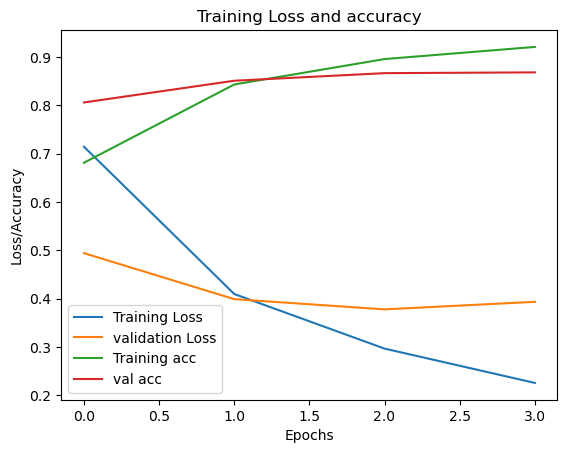

In [31]:
#N is the number of epochs
N=4
plt.figure()
plt.plot(np.arange(0,N),history.history['loss'],label='Training Loss')
plt.plot(np.arange(0,N),history.history['val_loss'],label='validation Loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Training acc')
plt.plot(np.arange(0,N),history.history['val_accuracy'],label='val acc')
plt.title('Training Loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc="lower left")
plt.savefig("LSTM1.png")

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
predicted_labels = model.predict(X_test)

136/136 [==============================] - 6s 47ms/step


In [34]:
predicted_labels = np.argmax(predicted_labels, axis=1)

In [35]:
from sklearn.metrics import classification_report


In [36]:
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_test.argmax(axis=1),predicted_labels,target_names=target_names))

              precision    recall  f1-score   support

    positive       0.71      0.72      0.72       398
     neutral       0.85      0.81      0.83      1579
    negative       0.91      0.93      0.92      2358

    accuracy                           0.87      4335
   macro avg       0.82      0.82      0.82      4335
weighted avg       0.87      0.87      0.87      4335

